**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#Importing the data and reading the First 5 columns

df = pd.read_csv('C:/Users/USER/Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Every column has the appropriate datatype

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Checking for null values (Which were represented as 0 in this dataset except for outcome and pregnancies) and replacing them wih the mean

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

We have several null values that need to be worked on. 

In [7]:
#Filling the null values with the mean

#Creating function to find the mean

def mean_column(var):
    mean = df[df[var].notnull()]
    mean = round(mean[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index(),1)
    return mean

In [8]:
mean_column('Glucose')

,Outcome,Glucose
0,0,110.6
1,1,142.3


In [9]:
#replace the nulls

df.loc[(df['Outcome'] == 0) & (df['Glucose'].isnull()),'Glucose'] = 110.6
df.loc[(df['Outcome'] == 1) & (df['Glucose'].isnull()),'Glucose'] = 142.3

In [10]:
mean_column('BloodPressure')

,Outcome,BloodPressure
0,0,70.9
1,1,75.3


In [11]:
#replace the nulls

df.loc[(df['BloodPressure'] == 0) & (df['BloodPressure'].isnull()),'BloodPressure'] = 70.9
df.loc[(df['BloodPressure'] == 1) & (df['BloodPressure'].isnull()),'BloodPressure'] = 75.3

In [12]:
mean_column('SkinThickness')

,Outcome,SkinThickness
0,0,27.2
1,1,33.0


In [13]:
#replace the nulls

df.loc[(df['SkinThickness'] == 0) & (df['SkinThickness'].isnull()),'SkinThickness'] = 27.2
df.loc[(df['SkinThickness'] == 1) & (df['SkinThickness'].isnull()),'SkinThickness'] = 33.0

In [14]:
mean_column('Insulin')

,Outcome,Insulin
0,0,130.3
1,1,206.8


In [15]:
#replace the nulls

df.loc[(df['Insulin'] == 0) & (df['Insulin'].isnull()),'Insulin'] = 130.3
df.loc[(df['Insulin'] == 1) & (df['Insulin'].isnull()),'Insulin'] = 206.8

In [16]:
mean_column('BMI')

,Outcome,BMI
0,0,30.9
1,1,35.4


In [17]:
#replace the nulls

df.loc[(df['BMI'] == 0) & (df['BMI'].isnull()),'BMI'] = 30.9
df.loc[(df['BMI'] == 1) & (df['BMI'].isnull()),'BMI'] = 35.4

In [18]:
df.dropna(inplace = True)

In [19]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.shape

(393, 9)

### Visualizations

C:\Users\USER\AppData\Local\Temp\ipykernel_19640\3448843711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = df['Outcome'], palette = 'rocket')


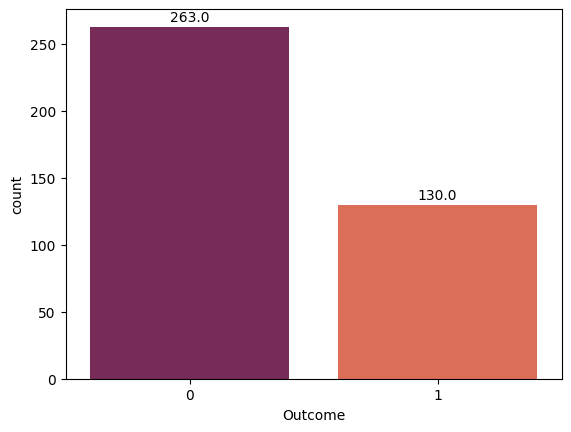

In [22]:
# countplot --> added labels as well

plot = sns.countplot(x = df['Outcome'], palette = 'rocket')

for labels in plot.patches: #plot.patches helps us to know the categories on the x axis, in our case its 0 and 1
    plot.annotate(format(labels.get_height()), (labels.get_x()+labels.get_width() / 2. , labels.get_height()), ha = 'center', va = 'center', xytext = (0,7), textcoords='offset points')
plt.show()

In [23]:
#Correlation plot

corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198835,0.212708,0.094646,0.080848,-0.023913,0.008737,0.680120,0.257521
Glucose,0.198835,1.000000,0.209701,0.199489,0.581295,0.210080,0.140722,0.344126,0.515977
BloodPressure,0.212708,0.209701,1.000000,0.231734,0.097584,0.303626,-0.016403,0.298997,0.192055
SkinThickness,0.094646,0.199489,0.231734,1.000000,0.184211,0.664916,0.161694,0.169541,0.257086
Insulin,0.080848,0.581295,0.097584,0.184211,1.000000,0.228050,0.137465,0.219232,0.302763
BMI,-0.023913,0.210080,0.303626,0.664916,0.228050,1.000000,0.159833,0.071566,0.271120
DiabetesPedigreeFunction,0.008737,0.140722,-0.016403,0.161694,0.137465,0.159833,1.000000,0.086479,0.210248
Age,0.680120,0.344126,0.298997,0.169541,0.219232,0.071566,0.086479,1.000000,0.351897
Outcome,0.257521,0.515977,0.192055,0.257086,0.302763,0.271120,0.210248,0.351897,1.000000


<Axes: >

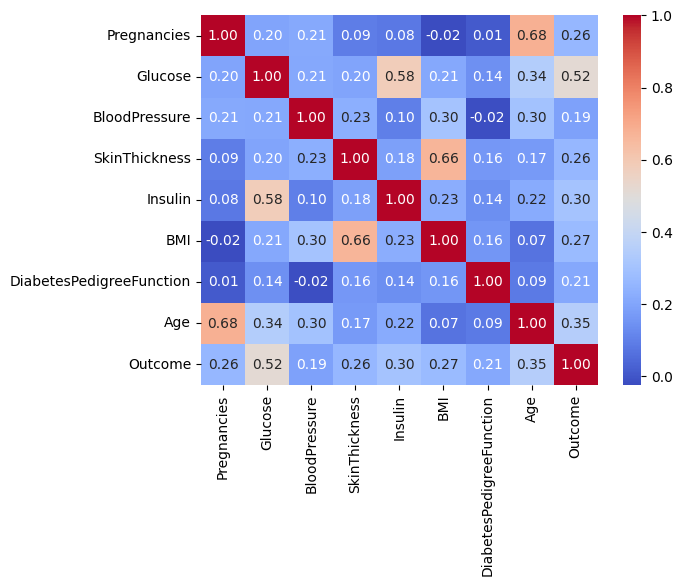

In [24]:
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True, fmt = '.2f')

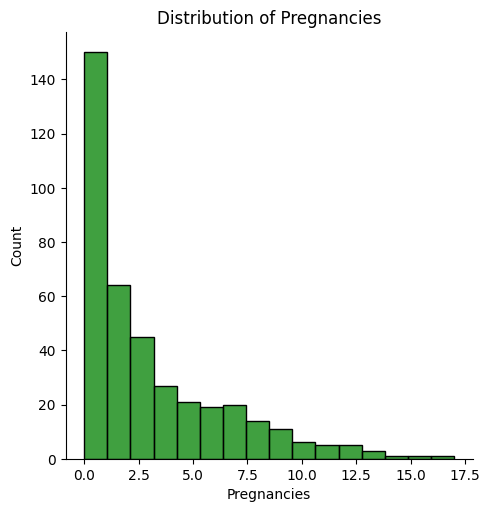

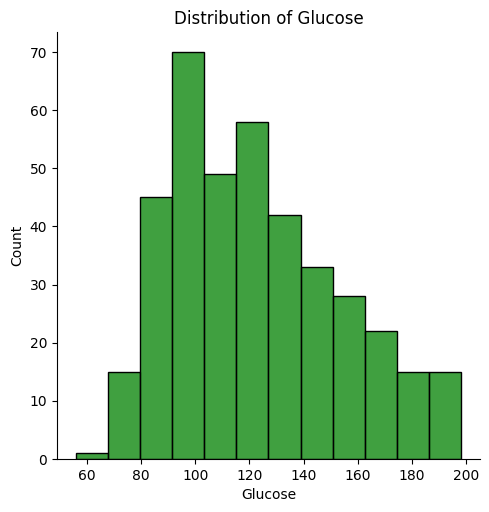

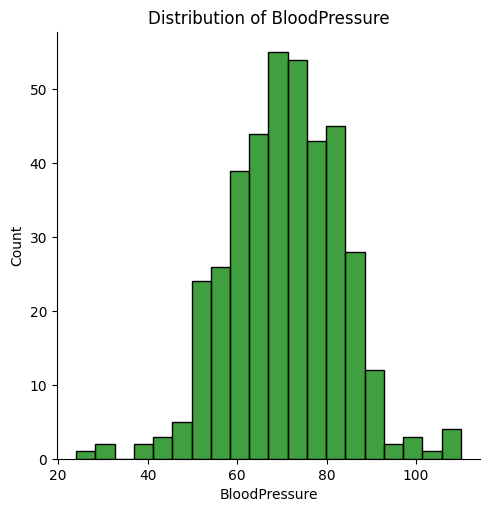

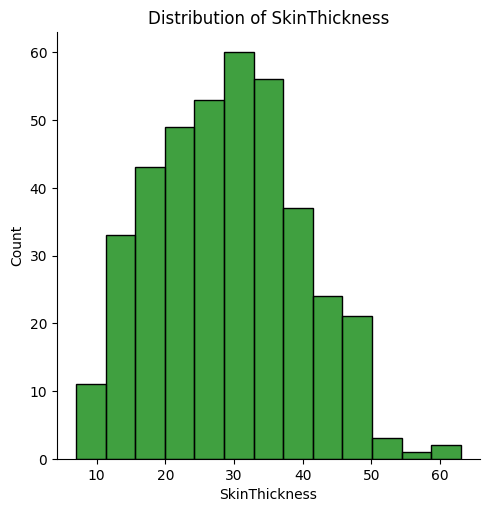

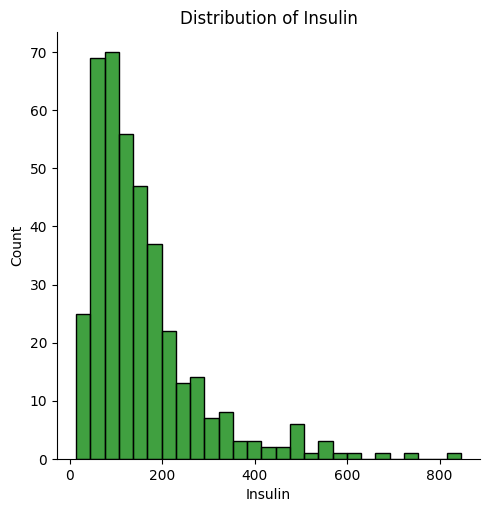

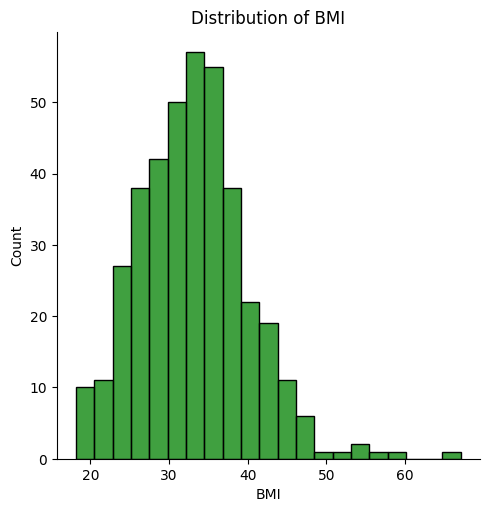

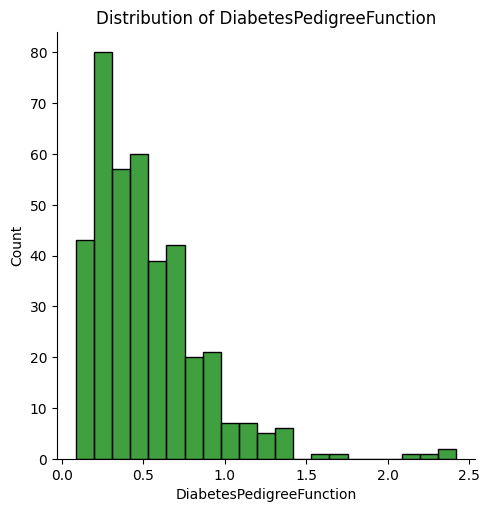

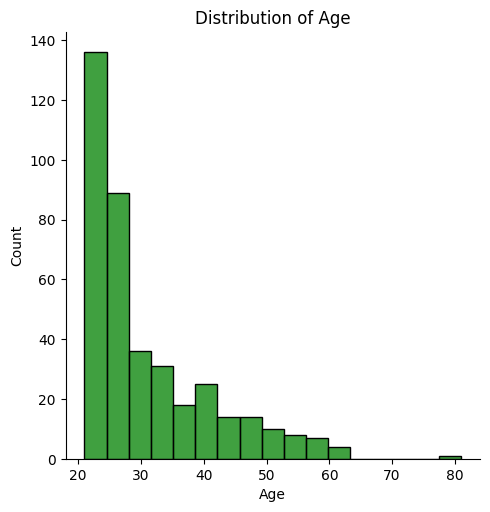

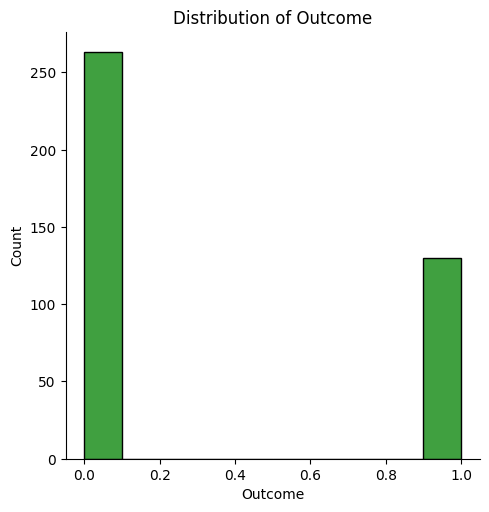

In [25]:
#Distplots for each column using for loop

for i in df.columns:
    sns.displot(df[i], color='green')
    plt.title(f'Distribution of {i}')
    plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

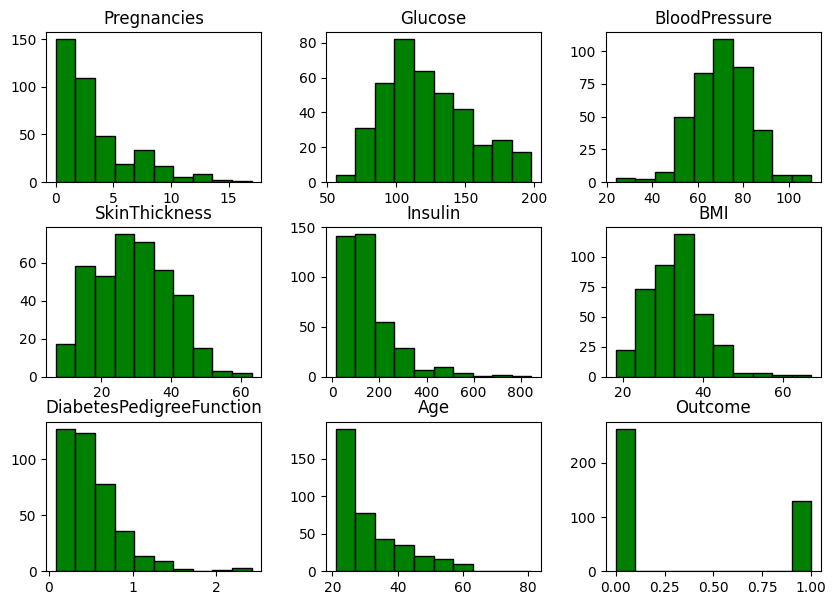

In [26]:
#Plotting histograms for each column

plt.rcParams['figure.figsize'] = (10,7)
df.hist(grid = False, edgecolor = 'black', color = 'green')

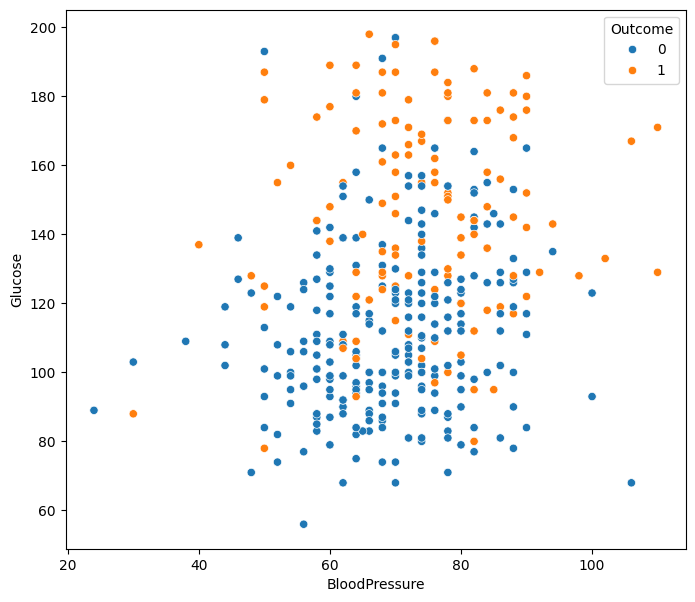

In [27]:
#Scatter plots

plt.rcParams['figure.figsize']= (8,7)
sns.scatterplot(x = df['BloodPressure'], y = df['Glucose'], hue = df['Outcome'])
plt.show()

In [35]:
#Feature engineering

x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

#Splitting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#getting the model

model = LogisticRegression()

#Fitting and training

model.fit(x_train, y_train)

#making predictions

y_predict = model.predict(x_test)

#Getting the confusion matrix

matrix = confusion_matrix(y_predict, y_test)
print('The confusion matrix of the model is: ',matrix)

#Accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print('The accuracy of the model is: ',round(accuracy*100,2), '%')

The confusion matrix of the model is:  [[50 11]
 [ 6 12]]
The accuracy of the model is:  78.48 %


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
